**Author:** Marco Graniero Celis (marcogranierocelis@gmail.com)

# Context and aim of the project

Transport for London (from now on referred as TfL) is a local government body responsible for the transport system in Greater London, England.

TfL has responsibility for London's network of principal road routes, for various rail networks including the London Underground, London Overground, Docklands Light Railway and TfL Rail. It does not control National Rail services in London, however, but does control London's trams, buses and taxis, cycling provision and river services. The underlying services are provided by a mixture of wholly owned subsidiary companies (principally London Underground), by private sector franchisees (the remaining rail services, trams and most buses) and by licensees (some buses, taxis and river services). TfL is also responsible, jointly with the national Department for Transport (DfT), for commissioning the construction of the new Crossrail line, and will be responsible for franchising its operation once completed.

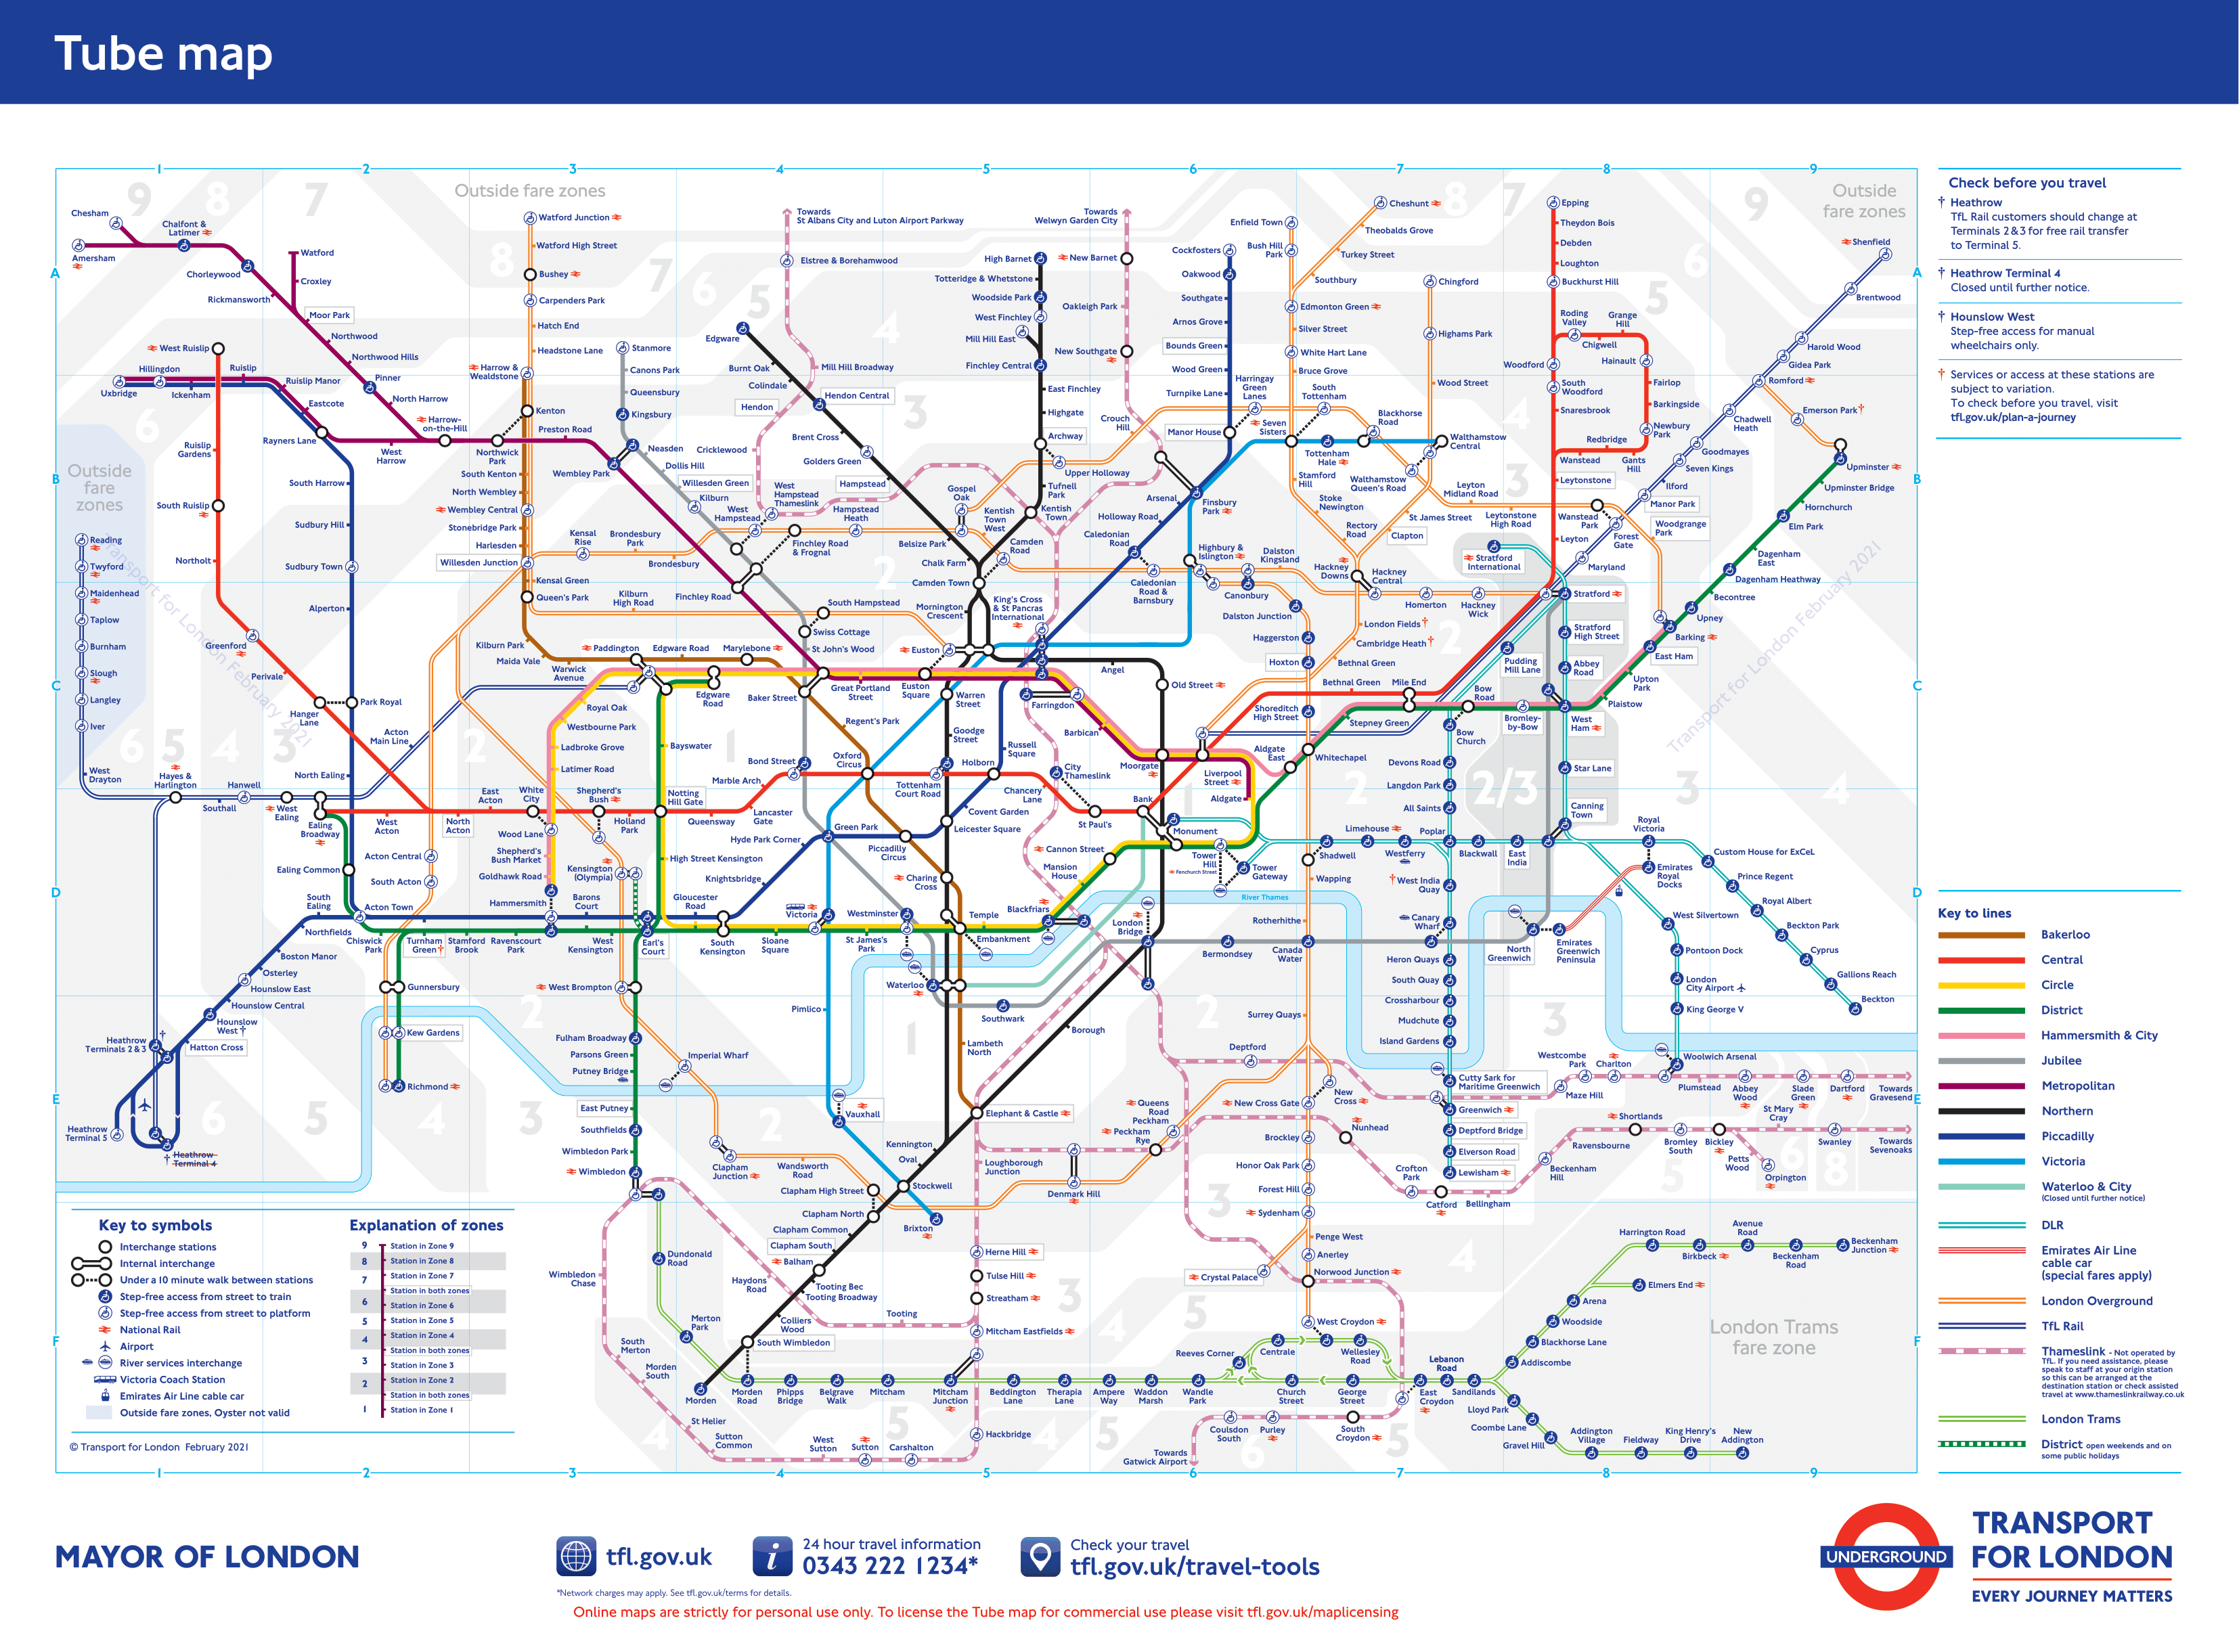
 
This project is intended to showcase in a practical and visual way the strong connection between transport, land use and demographics in big cities like London. 

Due to available data, we will only use railway services operated by TfL, that is:

- London Underground
- London Overground
- The Docklands Light Railway (DLR)
- TfL Rail (to be known as the 'Elisabeth Line' when completed)

This means we are not including Londoners' most privileged means of transport, buses, representing 14% of daily trips in London, against 11% for Underground/DLR. National Rail services are also not included here (they make up to 11% of Londoners' daily trips). (*Transport for London*, 2019)

However, the results of this study suggest that TfL's rail services' trips are representative of the complex dynamics observed in London.

# Methodology

The methods used in this analysis are aimed at presenting data in a simple, straightforward way, so that readers are able to easily visualise and integrate the concepts developed.

The different databases that were used in the course of this study are as follows:

- TfL Public Transport Service Planning. (2018, may). *Transport for London Annual Counts for LU/LO/DLR/TfL Rail (by quarter hour)*. http://crowding.data.tfl.gov.uk/Annual%20Station%20Counts/2017/ByQhrEntryExit_2017.xlsx
- TfL Public Transport Service Planning. (2018, jan). *Multi Year Station Entry & Exit Figures*. https://data.london.gov.uk/download/london-underground-performance-reports/b6ab04fc-9062-4291-b514-7fa218073b4c/multi-year-station-entry-and-exit-figures.xls
- Office of Rail Regulation. (2020, jan). *Train Station Usage*. http://www.rail-reg.gov.uk/server/show/nav.1529
- Wikipedia contributors. (2021). *List of Docklands Light Railway stations*. Wikipedia. https://en.wikipedia.org/wiki/List_of_Docklands_Light_Railway_stations
- Greater London Authority. (2020). *Statistical GIS Boundary Files for London*. London Datastore. https://data.london.gov.uk/dataset/statistical-gis-boundary-files-london
- Greater London Authority. (2020, feb). *London Borough Profiles and Atlas*. London Datastore. https://data.london.gov.uk/dataset/london-borough-profiles

The study has been conducted as it follows:
1. The data is retrieved from TfL's Annual Counts for each one of the network's stations.
2. Passenger flows are grouped in hours and differentiated between different modes (Underground, Overground, DLR, etc.) and direction (in or out).
3. A weighted sum is done to reveal how the station is used and whether it might be a station located in a major workzone or in a residential area.
4. The data is aggregated to a local authority level to classify boroughs as more or less residential.
5. The data is then crossed with the demographics to reveal the profile of a *typical* London residential borough.


# Results

Firstly, we import the following libraries:

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns

%matplotlib inline

- Pandas and Numpy are imported to better arrange and manipulate the data we have.
- Matplotlib and Seaborn are used to represent in a straightforward and comprehensible way our findings.
- Finally, for our geographic data, we will use Geopandas.

The colour class created below is aimed at better displaying our data.

In [2]:
class colour:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [3]:
entry_by_qhr = pd.read_excel("ByQhrEntryExit_2017.xlsx",sheet_name=1,skiprows=6)

In [4]:
def clean_name(name):
    return name.lower().strip().replace(" ","_")
clean_cols = []
for c in entry_by_qhr.columns:
    clean_cols.append(clean_name(c))

In [5]:
entry_by_qhr.columns = clean_cols

In [6]:
entry_by_qhr.sort_values("total",ascending=False)

,mode,nlc,asc,station,coverage,year,day,dir,total,early,...,0230-0245,0245-0300,0300-0315,0315-0330,0330-0345,0345-0400,0400-0415,0415-0430,0430-0445,0445-0500
512,LU,747,WLOu,Waterloo LU,Station entry / exit,2017,MTF,OUT,149577,3126,...,0,0,0,0,0,0,0,0,0,0
128,LU,625,KXXu,King's Cross St. Pancras,Station entry / exit,2017,MTF,IN,149150,2723,...,0,0,0,0,0,0,0,0,0,0
244,LU,747,WLOu,Waterloo LU,Station entry / exit,2017,MTF,IN,147574,4139,...,0,0,0,0,0,0,0,0,0,0
396,LU,625,KXXu,King's Cross St. Pancras,Station entry / exit,2017,MTF,OUT,146864,3529,...,0,0,0,0,0,0,0,0,0,0
437,LU,669,OXCu,Oxford Circus,Station entry / exit,2017,MTF,OUT,136405,2938,...,0,0,0,0,0,0,0,0,0,0
507,LU,741,VICu,Victoria LU,Station entry / exit,2017,MTF,OUT,122783,3395,...,0,0,0,0,0,0,0,0,0,0
169,LU,669,OXCu,Oxford Circus,Station entry / exit,2017,MTF,IN,121364,395,...,0,0,0,0,0,0,0,0,0,0
239,LU,741,VICu,Victoria LU,Station entry / exit,2017,MTF,IN,121018,3263,...,0,0,0,0,0,0,0,0,0,0
664,LU,625,KXXu,King's Cross St. Pancras,Station entry / exit,2017,SAT,IN,117237,1206,...,0,0,0,0,0,0,0,0,0,0
973,LU,669,OXCu,Oxford Circus,Station entry / exit,2017,SAT,OUT,113894,1236,...,0,0,0,0,0,0,0,0,0,0


In [7]:
stations = entry_by_qhr["station"].unique()
entry_by_qhr[entry_by_qhr["station"].str.contains("Oxford")]

,mode,nlc,asc,station,coverage,year,day,dir,total,early,...,0230-0245,0245-0300,0300-0315,0315-0330,0330-0345,0345-0400,0400-0415,0415-0430,0430-0445,0445-0500
169,LU,669,OXCu,Oxford Circus,Station entry / exit,2017,MTF,IN,121364,395,...,0,0,0,0,0,0,0,0,0,0
437,LU,669,OXCu,Oxford Circus,Station entry / exit,2017,MTF,OUT,136405,2938,...,0,0,0,0,0,0,0,0,0,0
705,LU,669,OXCu,Oxford Circus,Station entry / exit,2017,SAT,IN,103026,398,...,0,0,0,0,0,0,0,0,0,0
973,LU,669,OXCu,Oxford Circus,Station entry / exit,2017,SAT,OUT,113894,1236,...,0,0,0,0,0,0,0,0,0,0
1241,LU,669,OXCu,Oxford Circus,Station entry / exit,2017,SUN,IN,63185,386,...,0,0,0,0,0,0,0,0,0,0
1509,LU,669,OXCu,Oxford Circus,Station entry / exit,2017,SUN,OUT,65547,427,...,0,0,0,0,0,0,0,0,0,0


## Busiest stations for a given time and day

Below, we create a function that will return the n busiest stations (all modes combined) for a given period: Monday to Friday (MTF), Saturday (SAT) or Sunday (SUN).

In [8]:
def top_stations(day,top=10):
    day_entr = entry_by_qhr[entry_by_qhr["day"] == day]
    global_entr = day_entr.groupby("station").agg(np.sum).sort_values("total",ascending=False)
    modes_dict = {}
    for station in day_entr["station"].unique():
        mode_list =[]
        n_rows = day_entr[day_entr["station"]==station]
        for mode in n_rows["mode"]:
            if mode not in mode_list:
                mode_list.append(mode)    
            modes_dict[station] = mode_list
    print(colour.BOLD+colour.UNDERLINE+"Top {} stations by total daily passengers (IN/OUT, all TfL rail modes) on {}:".format(top,day)+colour.END)
    i=0
    for index, row in global_entr.head(top).iterrows():
        i += 1
        print(str(i) + ". " + colour.BOLD + row.name + colour.END + " - Daily passengers: {:,} - Services offered: {}.".format(row["total"],", ".join(map(str,modes_dict[row.name]))))
    
    return global_entr.head(top).index

In [9]:
for day in entry_by_qhr["day"].unique():
    top_stations(day)
    print("\n")

Top 10 stations by total daily passengers (IN/OUT, all TfL rail modes) on MTF:
1. Stratford - Daily passengers: 352,935 - Services offered: LU, LO, DLR, TfLRail.
2. Bank and Monument - Daily passengers: 330,249 - Services offered: LU, DLR.
3. Waterloo LU - Daily passengers: 297,151 - Services offered: LU.
4. King's Cross St. Pancras - Daily passengers: 296,014 - Services offered: LU.
5. Oxford Circus - Daily passengers: 257,769 - Services offered: LU.
6. Victoria LU - Daily passengers: 243,801 - Services offered: LU.
7. Liverpool Street LU - Daily passengers: 224,125 - Services offered: LU.
8. London Bridge LU - Daily passengers: 220,654 - Services offered: LU.
9. Canary Wharf LU - Daily passengers: 173,466 - Services offered: LU.
10. Paddington TfL - Daily passengers: 155,079 - Services offered: LU.


Top 10 stations by total daily passengers (IN/OUT, all TfL rail modes) on SAT:
1. Stratford - Daily passengers: 318,361 - Services offered: LU, LO, DLR, TfLRail.
2. King's Cross St. Panc

We observe that during weekdays (where the majority of passengers might be commuters) the busiest stations are the ones serving London's terminal stations where larger commuter rail lines such as Great Northern Railway, Southern or East Midlands Railway end.

Among the busiest stations we also find those serving some of London's most important job centres:
- *Bank and Monument* for the City of London.
- *Canary Wharf* for the Docklands.
- *Oxford Circus* for the Regent street and West End area.

In [10]:
def thousands(x, pos):
    return '%1.1fK' % (x*1e-3)

Next, we will write a function that, given a station and day, returns a graph representing the flow of passenger for each hour. We will differentiate the modes used and the direction of the flow (either into the station or out of it).

This will help us to identify any particular patterns that might be interesting to delve into.

In [11]:
def plot_station_passengers(station,interval="1 hour",days="MTF"):
    
    day_dict = {"MTF" : "weekdays (Mon. to Fri.)","SAT" : "Saturday","SUN":"Sunday"}
    
    if station not in entry_by_qhr["station"].unique():
        print("We are sorry, the station you selected is not a part of TfL's rail network")
        return False
    
    if interval == "1 hour":
        time = 4
    elif interval == "30 minutes":
        time = 2
    elif interval == "15 minutes":
        time = 1
        
    hour_cols = range(15,111)
    
    station_trafic = entry_by_qhr[(entry_by_qhr["station"] == station) & (entry_by_qhr["day"] == days)]
    station_in = station_trafic[station_trafic["dir"] == "IN"]
    station_out = station_trafic[station_trafic["dir"] == "OUT"]
    station_pass = pd.concat([station_in,station_out])
    
    n_in = []
    
    in_colors = ["darkred","firebrick","indianred","lightcoral"]
    i_c = 0
    out_colors = ["navy","blue","dodgerblue","lightskyblue"]
    o_c = 0

    bar_cols = []

    for index, row in station_pass.iterrows():
        new_ind = row["mode"] + " - " + row["dir"]
        n_in.append(new_ind)
        if row["dir"] == "IN":
            bar_cols.append(in_colors[i_c])
            i_c += 1
        elif row["dir"] == "OUT":
            bar_cols.append(out_colors[o_c])
            o_c += 1
    
    station_pass.index = n_in
    
    time_cols = station_pass.iloc[:,hour_cols].columns
    
    for i in range(0,int(len(time_cols)/time)):
        hour_name = time_cols[time*i][:2]
        station_pass[hour_name] = station_pass.iloc[:,(15+time*i):(15+time*(i+1))].sum(axis=1)
        
    fig = plt.Figure(figsize=(10,5))
    ax = fig.add_subplot(1,1,1)
        
    ax = station_pass.T.iloc[-24:,:].plot(kind="bar",stacked=True,color=bar_cols,rot=0)
    ax.set_title("Daily passengers in {} on {}\n".format(station,day_dict[days]),fontsize=14)
    for pos in ["right","left","top","bottom"]:   
        ax.spines[pos].set_visible(False)
    ax.tick_params(bottom=False,left=False)
    ax.set_xlabel("Hour of the day")
    ax.set_ylabel("Passengers per hour\n")
    formatter = matplot.ticker.FuncFormatter(thousands)
    ax.yaxis.set_major_formatter(formatter)
    ax.grid(axis='y',linestyle=':')
    
#     plt.savefig("{}.png".format(station + " " + days))
    
    return ax

Top 5 stations by total daily passengers (IN/OUT, all TfL rail modes) on MTF:
1. Stratford - Daily passengers: 352,935 - Services offered: LU, LO, DLR, TfLRail.
2. Bank and Monument - Daily passengers: 330,249 - Services offered: LU, DLR.
3. Waterloo LU - Daily passengers: 297,151 - Services offered: LU.
4. King's Cross St. Pancras - Daily passengers: 296,014 - Services offered: LU.
5. Oxford Circus - Daily passengers: 257,769 - Services offered: LU.


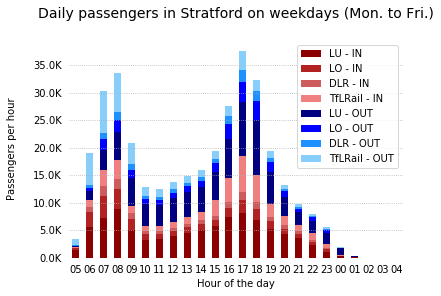

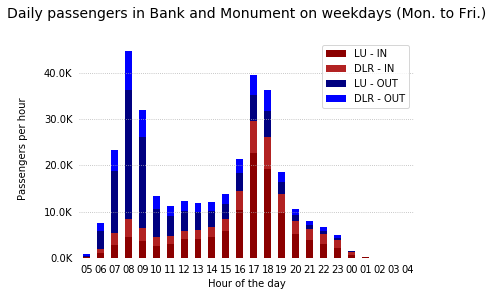

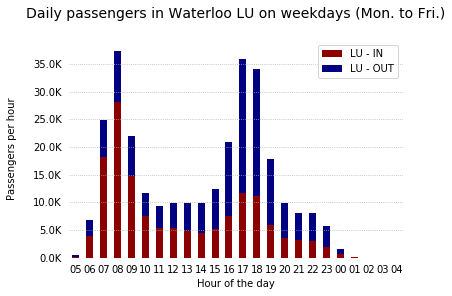

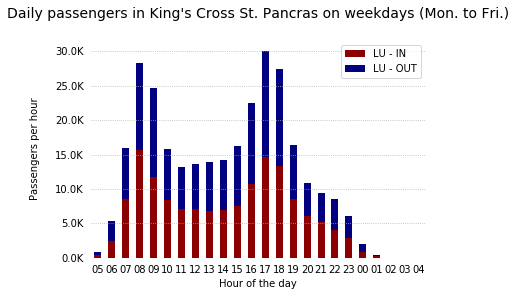

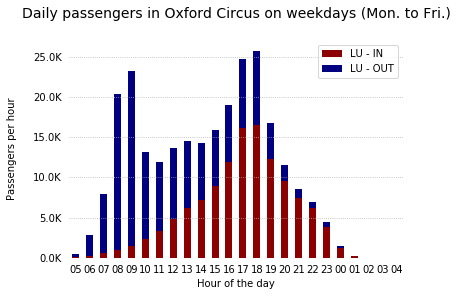

In [12]:
chosen_period = "MTF"
tope = top_stations(day=chosen_period,top=5)
axes = []
for stat in tope:
    axes.append(plot_station_passengers(stat,days=chosen_period))

The graphical results obtained are, on the whole, consistent with what one would expect: high traffic during peak hours (between 7 and 9 am and between 4 and 8 pm).

However, while some stations - such as Stratford - have a sort of "balanced" use throughout the day (i.e. stations where the proportion of people entering and leaving is rather similar), others - such as Bank and Monument - have rather uneven proportions depending on the time of day.

To further this idea, we will make a weighted sum with the number of exits and the number of entries. A station will be considered to be in a residential area if it has many more entries in the morning and exits in the evening than the opposite situation (exits in the morning and entries in the evening). 

Then, the values obtained are normalized between -1 and 1 to analyse the results in a more organic way.


\* **Note**: *It is acknowledged that the chosen colours might be challenging for individuals in the spectrum of colour-blindness. A new palette may be chosen for a final version of the analysis.*

## Characterisation of the stations' surrounding area

In [13]:
def pop_vs_job(station):
    if station not in entry_by_qhr["station"].unique():
        print("We are sorry, the station you selected is not a part of TfL's rail network")
        return False
    
    am_pm = entry_by_qhr.loc[entry_by_qhr["station"] == station,["am_peak","pm_peak","dir"]]
    am_pm_pt = am_pm.pivot_table(["am_peak","pm_peak"],"dir",aggfunc=np.sum)
    for peak in ["am_peak","pm_peak"]:
        am_pm_pt["{}_per".format(peak[:2])] = am_pm_pt[peak]/am_pm_pt.sum()[peak] * 100
    residential = am_pm_pt.loc["IN","am_per"]*am_pm_pt.loc["OUT","pm_per"]
    job = am_pm_pt.loc["OUT","am_per"]*am_pm_pt.loc["IN","pm_per"]
    return residential-job

In [14]:
pop_vs_job_dict = {}
for station in entry_by_qhr["station"].unique():
    pop_vs_job_dict[station] = pop_vs_job(station)

In [15]:
pop_vs_job_df = pd.DataFrame.from_dict(pop_vs_job_dict, orient = 'index', columns = ["non_normalised"])
pop_vs_job_df.sort_values("non_normalised")

,non_normalised
Moorgate,-7328.431853
Mansion House,-7137.574147
Farringdon,-6989.968062
Liverpool Street NR,-6949.202297
Chancery Lane,-6571.894918
Temple,-6565.283649
St. Paul's,-6406.307203
St. James's Park,-6171.770144
Warren Street,-6151.252447
Goodge Street,-5977.165279


In [16]:
pop_vs_job_df.dropna(inplace=True)

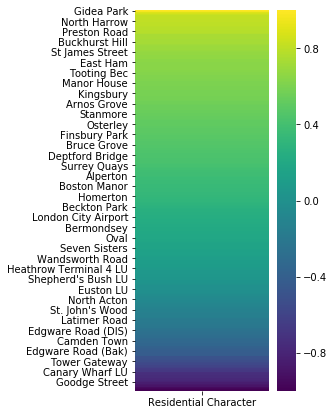

In [17]:
pop_vs_job_df["normalised"] =(pop_vs_job_df-pop_vs_job_df.min())/(pop_vs_job_df.max()-pop_vs_job_df.min())*2 - 1
# pop_vs_job_df.sort_values()
fig,ax = plt.subplots(figsize=(3,7))
ax = sns.heatmap(pop_vs_job_df["normalised"].sort_values(ascending=False).to_frame(name="Residential Character"), fmt="g", cmap='viridis')

We wish to aggregate the data from each station to the local authority level (the 32 boroughs and the City of London).

To do this, we will firstly use the NLC code specific to each train station in the UK to locate the borough where the station is located.

### NLC Codes

In [18]:
nlc_dict = {}

for station in entry_by_qhr["station"].unique():
    nlc_series = entry_by_qhr.loc[entry_by_qhr["station"] == station, "nlc"]
    nlc_dict[station] = nlc_series.iloc[0]   
    
pop_vs_job_df["nlc"] = pd.DataFrame.from_dict(nlc_dict,orient = 'index', columns = ["nlc"])

In [19]:
pop_vs_job_df

,non_normalised,normalised,nlc
Acton Town,2060.229173,0.305301,500
Aldgate,-3032.168623,-0.402693,502
Aldgate East,-2115.245021,-0.275213,503
Alperton,2585.382756,0.378313,505
Amersham,4497.168391,0.644107,506
Angel,-2043.655874,-0.265260,507
Archway,2929.922527,0.426214,508
Arnos Grove,3942.500591,0.566992,509
Arsenal,4205.826229,0.603602,510
Baker Street,-3203.272607,-0.426481,511


In [20]:
LU_boroughs = pd.read_excel("multi-year-station-entry-and-exit-figures.xls",sheet_name = "2017 Entry & Exit", skiprows=6)
LU_boroughs = LU_boroughs[["nlc","Station","Borough"]].dropna()
LU_boroughs[LU_boroughs["Station"] == "Barking"]
pop_vs_jobs_bor = pop_vs_job_df.reset_index().merge(LU_boroughs,how="left",on="nlc").set_index('index').drop(["Station"],axis=1).rename(columns={'Borough': 'borough'})
pop_vs_jobs_bor

,non_normalised,normalised,nlc,borough
index,,,,
Acton Town,2060.229173,0.305301,500,Ealing
Aldgate,-3032.168623,-0.402693,502,City of London
Aldgate East,-2115.245021,-0.275213,503,Tower Hamlets
Alperton,2585.382756,0.378313,505,Brent
Amersham,4497.168391,0.644107,506,Chiltern
Angel,-2043.655874,-0.265260,507,Islington
Archway,2929.922527,0.426214,508,Islington
Arnos Grove,3942.500591,0.566992,509,Enfield
Arsenal,4205.826229,0.603602,510,Islington


We see that the available data leaves plenty of stations with an unassigned borough. We realise that the majority of these stations are ones having National Rail services alongside with TfL's rail services.

Therefore, we will use a list of all of the UK's rail stations from the Office for Rail Regulation and extract the local authority where they are situated.

In [21]:
NR_boroughs = pd.read_excel("station-usage.xlsx",sheet_name = "2018-19")
NR_boroughs = NR_boroughs[["NLC","Local Authority"]]

In [22]:
NR_boroughs.rename(columns = {"NLC":"nlc","Local Authority" : "local_authority"}, inplace = True)
pop_vs_jobs_bor = pop_vs_jobs_bor.reset_index().merge(NR_boroughs,how="left",on="nlc").set_index('index')

In [23]:
null_bool = pop_vs_jobs_bor["borough"].isnull()
pop_vs_jobs_bor.borough.fillna(pop_vs_jobs_bor.local_authority,inplace=True)
del pop_vs_jobs_bor["local_authority"]

In [24]:
pop_vs_jobs_bor["borough"].value_counts(dropna=False)

NaN                                      40
City of Westminster                      31
Brent                                    21
Ealing                                   16
Camden                                   16
Hammersmith and Fulham                   15
Hillingdon                               15
Hackney (London)                         13
Barnet                                   13
Kensington and Chelsea                   12
Redbridge                                11
City of London                           10
Islington                                10
Harrow                                    9
Camden (London)                           9
Tower Hamlets                             9
Lambeth                                   8
Epping Forest                             7
Southwark                                 7
Waltham Forest (London)                   7
Southwark (London)                        6
Hounslow                                  6
Haringey                        

In [25]:
pop_vs_jobs_bor

,non_normalised,normalised,nlc,borough
index,,,,
Acton Town,2060.229173,0.305301,500,Ealing
Aldgate,-3032.168623,-0.402693,502,City of London
Aldgate East,-2115.245021,-0.275213,503,Tower Hamlets
Alperton,2585.382756,0.378313,505,Brent
Amersham,4497.168391,0.644107,506,Chiltern
Angel,-2043.655874,-0.265260,507,Islington
Archway,2929.922527,0.426214,508,Islington
Arnos Grove,3942.500591,0.566992,509,Enfield
Arsenal,4205.826229,0.603602,510,Islington


We now have 40 stations with an unassigned local authority. We recognise the remaining stations as being part of the Docklands Light Railway (DLR) system serving parts of London's East End.

To obtain the location of these stations, we will use the data offered by the DLR Wikipedia page. We will import the table, looking only at the station names and boroughs.

We delete the "DLR" tag on our original dataset to match our stations with the ones found on Wikipedia.

In [26]:
link = "https://en.wikipedia.org/wiki/List_of_Docklands_Light_Railway_stations"

tables = pd.read_html(link)

DLR_df = tables[1]
DLR_df.columns = DLR_df.iloc[0,:]
DLR_df = DLR_df.iloc[1:,[0,2]].reset_index(drop=True)

pattern = r"\(.+\)"
DLR_df["Station"] = DLR_df["Station"].str.replace(pattern,"")
DLR_df.drop_duplicates(subset="Station",inplace=True)
DLR_df.set_index(["Station"],inplace=True)
DLR_df.index.names = ['station']
DLR_df.rename(index={"Cutty Sark for Maritime Greenwich":"Cutty Sark"},inplace=True)


DLR_df

,Local Authority
station,
Abbey Road,Newham
All Saints,Tower Hamlets
Bank,City of London
Beckton,Newham
Beckton Park,Newham
Blackwall,Tower Hamlets
Bow Church,Tower Hamlets
Canary Wharf,Tower Hamlets
Canning Town,Newham


In [27]:
pop_vs_jobs_bor["DLR_boro"] = DLR_df

In [28]:
pop_vs_jobs_bor.borough.fillna(pop_vs_jobs_bor.DLR_boro,inplace=True)
del pop_vs_jobs_bor["DLR_boro"]

In [29]:
null_vals_w_DLR = pop_vs_jobs_bor[pop_vs_jobs_bor["borough"].isnull()].index
null_vals = null_vals_w_DLR.str.replace(" DLR","")

In [30]:
for null_val in pop_vs_jobs_bor.index:
    if null_val in null_vals_w_DLR:
        pop_vs_jobs_bor.loc[null_val,"borough"] = DLR_df.loc[null_val.replace(" DLR",""),"Local Authority"]

In [31]:
pop_vs_jobs_bor.isnull().sum()

non_normalised    0
normalised        0
nlc               0
borough           0
dtype: int64

In [32]:
pop_vs_jobs_bor["borough"].value_counts(dropna=False)

City of Westminster                      31
Tower Hamlets                            26
Newham                                   22
Brent                                    21
Camden                                   16
Ealing                                   16
Hillingdon                               15
Hammersmith and Fulham                   15
Hackney (London)                         13
Barnet                                   13
Kensington and Chelsea                   12
City of London                           11
Redbridge                                11
Islington                                10
Camden (London)                           9
Harrow                                    9
Lambeth                                   8
Southwark                                 7
Waltham Forest (London)                   7
Epping Forest                             7
Enfield (London)                          6
Southwark (London)                        6
Wandsworth                      

In [33]:
pop_vs_jobs_bor["borough"] = pop_vs_jobs_bor["borough"].str.strip().str.replace(" \(London\)","")
city_bool = pop_vs_jobs_bor["borough"] == "City and County of the City of London"
pop_vs_jobs_bor.loc[city_bool,"borough"] = "City of London"
richmond_bool = pop_vs_jobs_bor["borough"] == "Richmond"
pop_vs_jobs_bor.loc[richmond_bool,"borough"] = "Richmond upon Thames"

In [34]:
pop_vs_jobs_bor["borough"].value_counts(dropna=False)

City of Westminster       31
Tower Hamlets             31
Newham                    27
Camden                    25
Brent                     24
Ealing                    18
Hammersmith and Fulham    17
Hillingdon                15
Redbridge                 15
Hackney                   14
Islington                 14
Southwark                 13
Barnet                    13
City of London            12
Kensington and Chelsea    12
Harrow                    11
Waltham Forest            11
Enfield                   10
Haringey                  10
Lambeth                   10
Havering                   8
Wandsworth                 7
Epping Forest              7
Lewisham                   7
Hounslow                   6
Three Rivers               5
Merton                     5
Barking and Dagenham       5
Greenwich                  5
Watford                    4
Bromley                    3
Chiltern                   3
Croydon                    2
Brentwood                  2
Richmond upon 

## The borough's residential character

Now that we have all of our stations' location, we proceed to aggregate all of our data to the borough-level. Then, we calculate the mean and obtain the *residential character* of each one of London's boroughs.

The data we obtain seems logical: Outer London boroughs are significantly more residential than their Inner London counterparts. Moreover, the difference is starker with the boroughs containing important job centres such as the City, the Islington Innovation Cluster, the City of Westminster or the Docklands Area.

However, we would like to give our readers a clearer understanding of these results. Here is where Geopandas will come across as useful: we will use the Greater London Authority's geographical information data to represent the spatial differences in London.

In [35]:
borough_residential_character = pd.pivot_table(pop_vs_jobs_bor,"normalised","borough",aggfunc=np.mean)

In [36]:
borough_residential_character.sort_values("normalised")

,normalised
borough,
City of London,-0.621568
City of Westminster,-0.309772
Kensington and Chelsea,-0.295894
Camden,-0.200737
Watford,-0.022777
Hammersmith and Fulham,0.028896
Richmond upon Thames,0.062706
Islington,0.066375
Tower Hamlets,0.066655


Text(-117.375, 0.5, 'Borough / Local Authority')

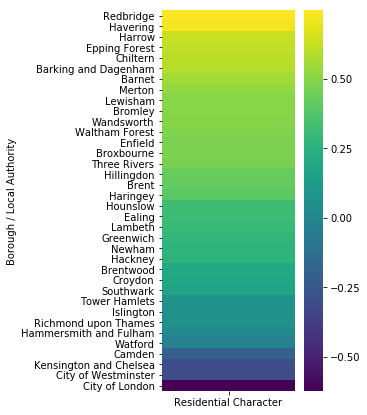

In [37]:
fig,ax = plt.subplots(figsize=(3,7))
ax = sns.heatmap(borough_residential_character["normalised"].sort_values(ascending=False).to_frame(name="Residential Character"), fmt="g", cmap='viridis')
plt.savefig("residential_character_London_borough_by_rail_entries.png")
ax.set_ylabel("Borough / Local Authority")

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.6 160201.8, 516407.3 160210.5..."
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.2 159504.7, 535005.5 159502, ..."
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.6 157530.4, 540361.2 157551.9..."
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.8 178100, 521967.7 178096.8, ..."
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.5 182881.6, 510249.9 182886, ..."


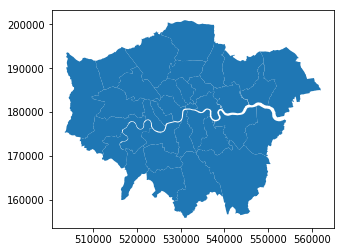

In [38]:
path = r"C:\Users\marco\Desktop\Tontería2\London Underground\statistical-gis-boundaries-london\ESRI"
london_map = gpd.read_file(path+"\London_Borough_Excluding_MHW.shp")
london_map.loc[london_map["NAME"] == "Westminster","NAME"] = "City of Westminster"
london_map.plot()
london_map.head()

In [39]:
to_merge = borough_residential_character.reset_index().rename(columns={"borough":"NAME"})
london_map = london_map.merge(to_merge,how="left",on="NAME")
london_map

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,normalised
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.6 160201.8, 516407.3 160210.5...",NaN
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.2 159504.7, 535005.5 159502, ...",0.190631
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.6 157530.4, 540361.2 157551.9...",0.501622
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.8 178100, 521967.7 178096.8, ...",0.323270
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.5 182881.6, 510249.9 182886, ...",0.317464
5,Havering,E09000016,11445.735,210.763,F,None,None,"POLYGON ((549893.9 181459.8, 549894.6 181465.7...",0.721504
6,Hillingdon,E09000017,11570.063,0.000,F,None,None,"POLYGON ((510599.8 191689.5, 510615.2 191591.3...",0.426155
7,Harrow,E09000015,5046.330,0.000,F,None,None,"POLYGON ((510599.8 191689.5, 510660 191690.9, ...",0.629857
8,Brent,E09000005,4323.270,0.000,F,None,None,"POLYGON ((525201 182512.6, 525181.5 182521.1, ...",0.415458
9,Barnet,E09000003,8674.837,0.000,F,None,None,"POLYGON ((524579.9 198355.2, 524594.3 198321.4...",0.553667


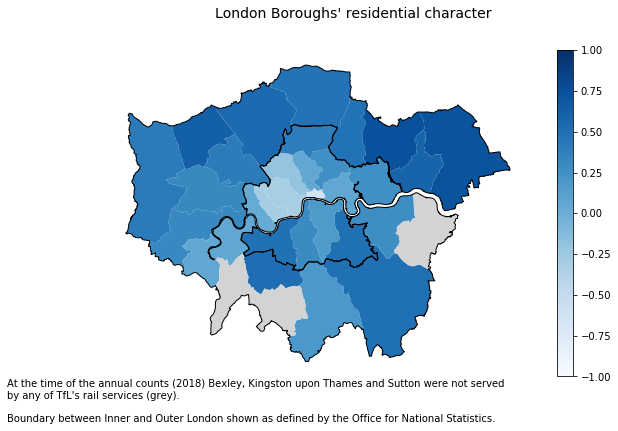

In [40]:
fig,ax = plt.subplots(figsize=(10,6))
london_map.plot(column = "normalised",cmap="Blues",missing_kwds=dict(color="lightgrey",label="No data"),legend=True,vmin=-1,vmax=1,ax=ax)
inner_outer = london_map.dissolve(by="ONS_INNER")
inner_outer.boundary.plot(edgecolor="k",linewidth = 1,ax=ax)
for pos in ["right","left","top","bottom"]:   
    ax.spines[pos].set_visible(False)
ax.tick_params(top=False,bottom=False,left=False,right=False)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.figtext(.02, .02, "At the time of the annual counts (2018) Bexley, Kingston upon Thames and Sutton were not served\nby any of TfL's rail services (grey).\n\nBoundary between Inner and Outer London shown as defined by the Office for National Statistics.",fontsize=10)
fig.suptitle("London Boroughs' residential character",fontsize=14)
plt.show()

Now you can clearly see the difference between the inner boroughs and the outer boroughs - especially those north of the Thames.

As we said above, the data seems logical with what we know: the most important business centres of the city (listed below) are located within the limits of Inner London.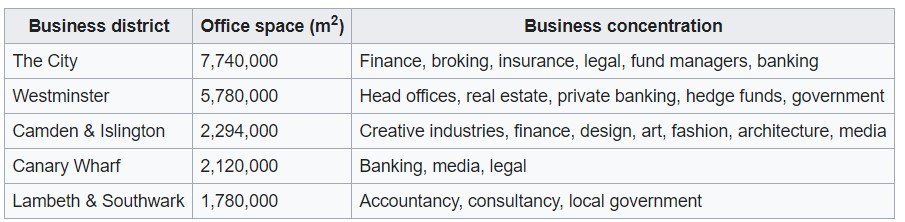

## What makes London's residential boroughs *residential* ?

We now turn to the demographics of London to determine the characteristics of the residential boroughs. The most recent data from the Greater London Authority's London Borough Profile Atlas will be used.

We will use a simple linear correlation formula to calculate the correlation between our *residential score* and the different demographical characteristics and we will consider as "relevant" those obtaining an absolute value higher than 0.25.

In [41]:
boroughs_profile = pd.read_excel("london-borough-profiles.xlsx",sheet_name="Data").iloc[1:34,:].rename(columns={"New code":"GSS_CODE"}).reset_index(drop=True)

In [42]:
london_map = london_map.merge(boroughs_profile,how="left",on="GSS_CODE")

In [43]:
print(london_map.info())
to_correlate = london_map.apply(pd.to_numeric, errors='coerce').dropna(axis=1,how="all")
print(to_correlate.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 33 entries, 0 to 32
Data columns (total 93 columns):
NAME                                                                                                33 non-null object
GSS_CODE                                                                                            33 non-null object
HECTARES                                                                                            33 non-null float64
NONLD_AREA                                                                                          33 non-null float64
ONS_INNER                                                                                           33 non-null object
SUB_2009                                                                                            0 non-null object
SUB_2006                                                                                            0 non-null object
geometry                                                

In [44]:
correlations = to_correlate.corr()
correlations = correlations["normalised"]
correlations = correlations[abs(correlations)>0.25]
correlations

HECTARES                                                                                            0.546144
normalised                                                                                          1.000000
GLA Population Estimate 2017                                                                        0.586304
GLA Household Estimate 2017                                                                         0.446137
Inland Area (Hectares)                                                                              0.545296
Population density (per hectare) 2017                                                              -0.392599
Average Age, 2017                                                                                  -0.268667
Proportion of population aged 0-15, 2015                                                            0.728626
Proportion of population of working-age, 2015                                                      -0.577819
Net natural change 

Text(0.5, 0, 'Correlation coefficient with normalised residential score')

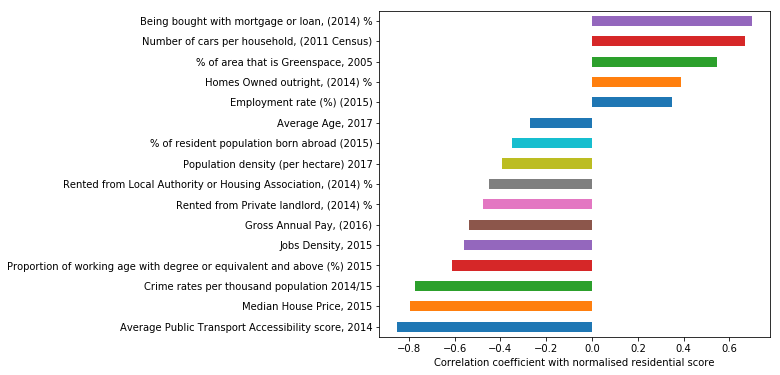

In [45]:
interesting_corr = ["Population density (per hectare) 2017",
                   "Average Age, 2017",
                   "% of resident population born abroad (2015)",
                   "Employment rate (%) (2015)",
                   "Gross Annual Pay, (2016)",
                   "Jobs Density, 2015",
                   "Crime rates per thousand population 2014/15",
                   "Median House Price, 2015",
                   "Homes Owned outright, (2014) %",
                   "Being bought with mortgage or loan, (2014) %",
                   "Rented from Local Authority or Housing Association, (2014) %",
                   "Rented from Private landlord, (2014) %",
                   "% of area that is Greenspace, 2005",
                   "Number of cars per household, (2011 Census)",
                   "Average Public Transport Accessibility score, 2014",
                   "Proportion of working age with degree or equivalent and above (%) 2015"]
fig,ax = plt.subplots(figsize=(7,6))
ax = correlations[interesting_corr].sort_values().plot.barh()
ax.set_xlabel("Correlation coefficient with normalised residential score")

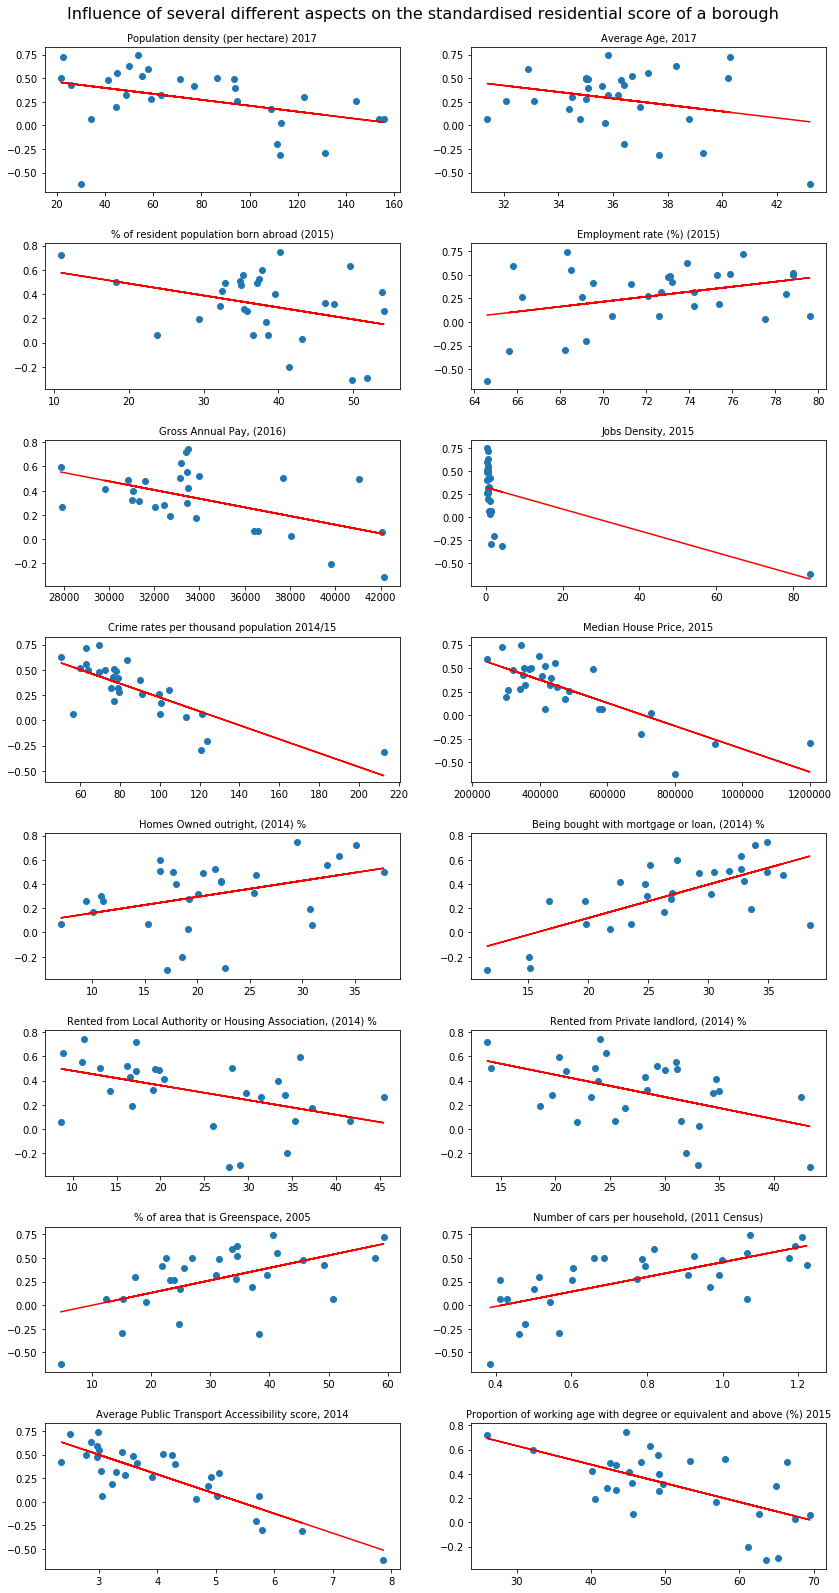

In [46]:
fig = plt.figure(figsize=(14,28))
i=1
for c in interesting_corr:
    ax = fig.add_subplot(8,2,i)
    bool_na = to_correlate[c].notnull() & to_correlate["normalised"].notnull()
    x=to_correlate.loc[bool_na,c]
    y=to_correlate.loc[bool_na,"normalised"]
    ax = plt.scatter(x,y)
    plt.title(c,fontsize=10)
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    ax = plt.plot(x,p(x),"r-")
    i += 1
    
fig.subplots_adjust(hspace=0.35)
fig.suptitle('Influence of several different aspects on the standardised residential score of a borough', fontsize=16,y=0.9)
plt.show()

                      NAME  Jobs Density, 2015  normalised
32          City of London               84.29   -0.621568
24     City of Westminster                4.30   -0.309772
25                  Camden                2.23   -0.200737
27               Islington                1.45    0.066375
23  Kensington and Chelsea                1.36   -0.295894
26           Tower Hamlets                1.35    0.066655
11               Southwark                1.27    0.171996
22  Hammersmith and Fulham                1.18    0.028896
6               Hillingdon                1.03    0.426155
3                 Hounslow                1.02    0.323270
19    Richmond upon Thames                0.81    0.062706
0     Kingston upon Thames                0.81         NaN
10                 Lambeth                0.76    0.301181
4                   Ealing                0.71    0.317464
20                  Merton                0.71    0.523281
28                 Hackney                0.70    0.2627

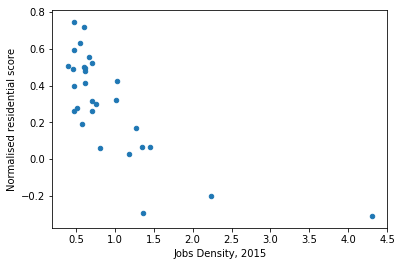

In [47]:
job_den = london_map.loc[:,["NAME","Jobs Density, 2015","normalised"]]
print(job_den.sort_values("Jobs Density, 2015",ascending=False))
job_den_no_CoL = pd.DataFrame(job_den.drop(32))

ax = job_den_no_CoL.plot.scatter(x="Jobs Density, 2015",y="normalised")
ax.set_ylabel("Normalised residential score")
print(colour.BOLD + colour.UNDERLINE + "\nJob density correlation with residential score (excluding the city of London):" + colour.END + " {:.2f}".format(job_den_no_CoL.corr().loc["Jobs Density, 2015","normalised"]))

# Conclusion

With this project, we have been able to discuss the characteristics that make up a typical residential area in the Greater London region from transport data. 

These results demonstrate once again the strong relationship between land use and the transport patterns of a given territory. 

In particular, we observe that a residential borough in London is characterised by:
- A low population density (compared to other areas of the British capital)
- A predominantly UK-born population
- A tendency to buy rather than rent their homes
- A relatively low accessibility to public transport (at least in comparison to the London average)
- An above average amount of green space

As noted at the beginning of the study, this is heavily biased by not including other modes of transport in the capital (notably buses and walking). In addition, the aggregation at borough level may be too large, as these are fairly large authorities with strong internal dynamics that vary usage widely across the borough.

To improve the quality of the study, a larger database including the said modes and aggregation at a smaller level (e.g. Output Area) would be required. Output areas (OA) were created for Census data, specifically for the output of census estimates. The OA is the lowest geographical level at which census estimates are provided. OAs were introduced in Scotland at the 1981 Census and in all the countries of the UK at the 2001 Census.

2001 Census OAs were built from clusters of adjacent unit postcodes but as they reflected the characteristics of the actual census data, they could not be generated until after data processing. They were designed to have similar population sizes and be as socially homogenous as possible based on tenure of household and dwelling type (homogeneity was not used as a factor in Scotland).